# Exercise Sheet 1: Neurons

In [3]:
import numpy as np
from scipy import constants
from matplotlib import pyplot as plt

## Task 1: The logistic function (1 point - programming)
Write a function "logistic(h,a=1)" resembling the logistic function and a second function "signtrafunc(h)" the step (sign-based) tranfer function. Also write a function "dlogistic(h,a=1)" resembling the derivative of the logistic function. Similarly, write a "gaussRBF(h,a=1)" resembling the gaussian Radial Basis Function and "dgaussRBF(h,a=1)" its derivative.

Plot each of them in the range of -10 to 10 together with their derivative (except for the sign-based function) with  matplotlibs plot function (plt.plot)).

For defining the sign-based transfer function the inline definition of functions using the syntax trafunc=lambda x: f(x) might be handy, please write the logistic function, however, as a classical function definition. The a=1 in the function definition sets the default to a=1 so the function needs only 1 argument by default.

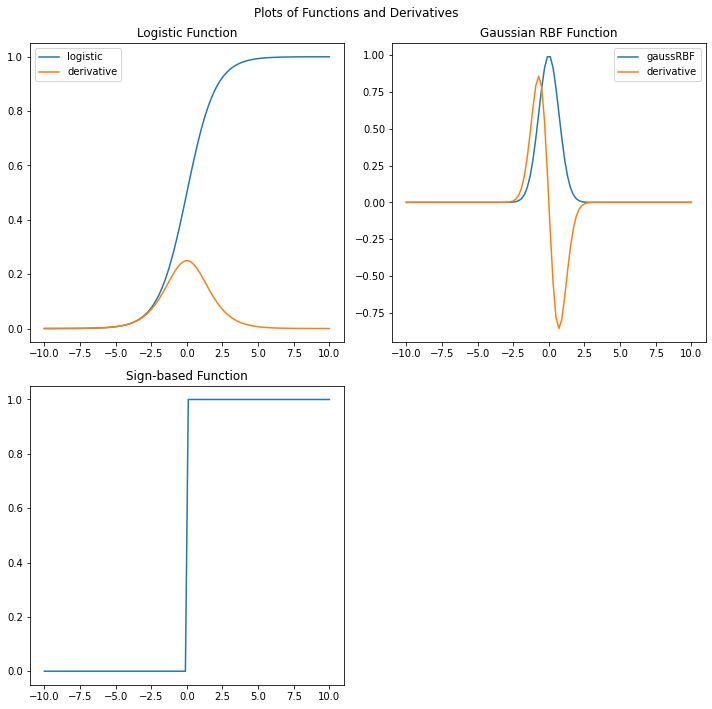

In [8]:
import matplotlib
def logistic(h,a=1):
    f = 1/(1 + np.exp(-a*h))    
    return f
def dlogistic(h, a=1):
    df = a * np.exp(-a*h) / (1 + np.exp(-a*h))**2
    return df

def gaussRBF(h,a=1):
    gauss = np.exp(-(a*h)**2)
    return gauss

def dgaussRBF(h,a=1):
    dgauss= -2*a*x*np.exp((-a*(x)**2))
    return dgauss

signtrafunc = lambda h: np.where(h >= 0, 1, 0)


x = np.linspace(-10, 10, 100)
y_logistic = logistic(x)
y_dlogistic = dlogistic(x)
y_gaussRBF = gaussRBF(x)
y_dgaussRBF = dgaussRBF(x)
y_signtrafunc = [signtrafunc(hi) for hi in x]
# Plot the logistic function and its derivative

fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0, 0].plot(x, y_logistic, label='logistic')
axs[0, 0].plot(x, y_dlogistic, label='derivative')
axs[0, 0].set_title('Logistic Function')
axs[0, 0].legend()

# Plot the Gaussian RBF function and its derivative
axs[0, 1].plot(x, y_gaussRBF, label='gaussRBF')
axs[0, 1].plot(x, y_dgaussRBF, label='derivative')
axs[0, 1].set_title('Gaussian RBF Function')
axs[0, 1].legend()

# Plot the sign-based function
axs[1, 0].plot(x, y_signtrafunc)
axs[1, 0].set_title('Sign-based Function')

# Remove the last subplot as it is unused
fig.delaxes(axs[1, 1])

# Add overall title and adjust spacing
fig.suptitle('Plots of Functions and Derivatives')
fig.tight_layout()

# Show the plot
plt.show()

## Task 2: Building an artificial neuron  (2 points - programming)
Define a class "neuron" resembling a simple perceptron. See https://docs.python.org/3/tutorial/classes.html for help on classes.

It should have the attributes "neuron.w" for the weights, "neuron.b" for the bias, the methods "neuron.trafunc(self,h)" for the transfer function, "neuron.dtrafunc(self,h)"  for the first derivative of the transfer function and the method "neuron.out(self,x)" to calculate the output for inputs *x* and acivation *h* respectively. 

Build a constructor method "\__init\__(self,...)", where self refers to the object itself, which assigns the weight vector *w*, the bias *b* , the transfer function "trafunc" and it's derivative "dtrafunc" to the neuron.

The transfer function and its derivative should best be assigned at construction in order to acccount for different possible transfer functions. You do not need to set a transfer function, yet, but you may implement the logistic function as the default transfer function.

In [10]:
class neuron:
    def __init__(self, w, b, trafunc = None, dtrafunc = None):
        self.w = w
        self.b = b
        self.trafunc = trafunc or self.logistic
        self.dtrafunc = dtrafunc or self.dlogistic
        
    def logistic(h,a=1):
        f = 1/(1 + np.exp(-a*h))    
        return f
    
    def dlogistic(h, a=1):
        df = a * np.exp(-a*h) / (1 + np.exp(-a*h))**2
        return df
    
    def out(self, x):
        h = np.dot(x, self.w) + self.b
        y = self.trafunc(h)
        return y, h

## Task 3: Use an artificial neuron (3 points - thinking and programming)
Use instances of the neuron class above to build the equivalents to logical "or" and "and"-functions using the binary (sign-based) transfer function and test them for 2-dimensional input vectors *x* resembling all possibilities of combinations ([0,0] [1,0], [0,1], [1,1]) by setting the weights and bias manually.

First, use the sign-based transfer function to solve the task with exact solution and then apply the same weights w and bias b on a neuron with the logistic and gaussian RBF transfer functions.

What's the difference?

We do not need the derivatives, here, so they may be set to anything. In particular, the sign-based function does not have a derivative.

*Hint: if you haven't succeeded with Task 2, you can solve Task 3 analytically and write down the needed weights and results.*

In [12]:
w_or = np.array([1, 1])
b_or = -0.5

w_and = np.array([1, 1])
b_and = -1.5

x = np.array([[0, 0], [1, 0], [0, 1], [1, 1]])

for item in [signtrafunc, logistic, gaussRBF]:

    n_or = neuron(w_or, b_or, trafunc=item)
    n_and = neuron(w_and, b_and, trafunc=item)

    y_or = np.array([n_or.out(xi)[0] for xi in x])
    print("OR output:", y_or)

    y_and = np.array([n_and.out(xi)[0] for xi in x])
    print("AND output:", y_and)


OR output: [0 1 1 1]
AND output: [0 0 0 1]
OR output: [0.37754067 0.62245933 0.62245933 0.81757448]
AND output: [0.18242552 0.37754067 0.37754067 0.62245933]
OR output: [0.77880078 0.77880078 0.77880078 0.10539922]
AND output: [0.10539922 0.77880078 0.77880078 0.77880078]


Answer: While the logistic function delivers a smooth propagation between different outputs, the radial basis function additionally changes the order of the results and is also capable of inversing them. In combination with an inner product as commonly used with logistic transfer function it serves as a dissimilarity measure: the higher the 'covariance' the lower the output. RBFs in Neural Networks are thus commonly used in combination with a distance measure instead of the inner product.

## Task 4: The electrical field strength of a monopole (3 points - analytic derivation)
Analytically derive the electrical field strength $\vec{E}=-\nabla\phi$ of an electrostatic monopolar 
field at origin in an inifinite homogeneous otherwise charge-free space step-by-step from the potential equation $\phi(\vec{r})=\frac{1}{4\pi\epsilon_0}\frac{Q}{\left|\vec{r}\right|}$ in Cartesian coordinates.

To this extent you will need to build the gradient $\nabla=\left(
\begin{array}{c}
	\frac{\delta}{\delta x}\\
	\frac{\delta}{\delta y}\\
	\frac{\delta}{\delta z}
\end{array}
\right)$!

The vector $\vec{r}=\left(
\begin{array}{c}
	x\\
	y\\
	z
\end{array}
\right)$ is the coordinates in cartesian coordinates and  the norm is the euclidean norm $\left|\vec{r}\right|=\sqrt{x^2+y^2+z^2}$.

*Hint: You can hand in the solution in your format of choice: Write direclty below (Markdown takes latex within $$, jsut double-click on the cell below), Pdf from Latex or Word, scan or photo of a hand-written derivation, etc....*

### Solution:
$\vec{E}=- \nabla \phi=-\left(
\begin{array}{c}
	\frac{\delta}{\delta x}\\
	\frac{\delta}{\delta y}\\
	\frac{\delta}{\delta z}
\end{array}
\right) \phi$



To derive the electrical field strength E⃗ from the given potential equation, we'll first express the potential equation in Cartesian coordinates, and then find the gradient of that potential.

The given potential equation is in spherical coordinates:

ϕ(r⃗ ) = (1/(4πϵ0)) * Q/|||r⃗ |||

where

    ϵ0 is the vacuum permittivity
    Q is the point charge at the origin
    |||r⃗ ||| is the distance from the origin to the point in space where we want to find the electric field

Let's first convert this to Cartesian coordinates. The relationship between spherical and Cartesian coordinates is:

x = r * sin(θ) * cos(ϕ)
y = r * sin(θ) * sin(ϕ)
z = r * cos(θ)

The distance from the origin is given by:

|||r⃗ ||| = sqrt(x^2 + y^2 + z^2)

Now we can write the potential equation in Cartesian coordinates as:

ϕ(x, y, z) = (1/(4πϵ0)) * Q/sqrt(x^2 + y^2 + z^2)

To find the electric field E⃗ , we need to take the negative gradient of this potential:

E⃗ = -∇ϕ

The gradient in Cartesian coordinates consists of partial derivatives with respect to each coordinate:

∇ϕ = (∂ϕ/∂x, ∂ϕ/∂y, ∂ϕ/∂z)

Now, we'll compute each partial derivative:

∂ϕ/∂x = ∂/∂x [ (1/(4πϵ0)) * Q/sqrt(x^2 + y^2 + z^2) ]
∂ϕ/∂x = -Q/(4πϵ0) * x * (x^2 + y^2 + z^2)^(-3/2)

Similarly,

∂ϕ/∂y = -Q/(4πϵ0) * y * (x^2 + y^2 + z^2)^(-3/2)
∂ϕ/∂z = -Q/(4πϵ0) * z * (x^2 + y^2 + z^2)^(-3/2)

So, the gradient of ϕ is:

∇ϕ = (-Q/(4πϵ0) * x * (x^2 + y^2 + z^2)^(-3/2), -Q/(4πϵ0) * y * (x^2 + y^2 + z^2)^(-3/2), -Q/(4πϵ0) * z * (x^2 + y^2 + z^2)^(-3/2))

Now, taking the negative of this gradient, we get the electric field E⃗ :

E⃗ = (Q/(4πϵ0) * x * (x^2 + y^2 + z^2)^(-3/2), Q/(4πϵ0) * y * (x^2 + y^2 + z^2)^(-3/2), Q/(4πϵ0) * z * (x^2 + y^2 + z^2)^(-3/2))

### Solution:

\(\vec{E} = - \nabla \phi = -\left(
\begin{array}{c}
	\frac{\partial}{\partial x} \\
	\frac{\partial}{\partial y} \\
	\frac{\partial}{\partial z}
\end{array}
\right) \phi\)

To derive the electric field strength \(\vec{E}\) from the given potential equation, we'll first express the potential equation in Cartesian coordinates and then find the gradient of that potential.

The given potential equation is in spherical coordinates:

\(\phi(\vec{r}) = \frac{1}{4\pi\epsilon_0} \cdot \frac{Q}{\|\vec{r}\|}\)

where

\(\epsilon_0\) is the vacuum permittivity,
\(Q\) is the point charge at the origin, and
\(\|\vec{r}\|\) is the distance from the origin to the point in space where we want to find the electric field.

Let's first convert this to Cartesian coordinates. The relationship between spherical and Cartesian coordinates is:

\(x = r \cdot \sin(\theta) \cdot \cos(\phi)\)
\(y = r \cdot \sin(\theta) \cdot \sin(\phi)\)
\(z = r \cdot \cos(\theta)\)

The distance from the origin is given by:

\(\|\vec{r}\| = \sqrt{x^2 + y^2 + z^2}\)

Now we can write the potential equation in Cartesian coordinates as:

\(\phi(x, y, z) = \frac{1}{4\pi\epsilon_0} \cdot \frac{Q}{\sqrt{x^2 + y^2 + z^2}}\)

To find the electric field \(\vec{E}\), we need to take the negative gradient of this potential:

\(\vec{E} = -\nabla \phi\)

The gradient in Cartesian coordinates consists of partial derivatives with respect to each coordinate:

\(\nabla \phi = \left(\frac{\partial \phi}{\partial x}, \frac{\partial \phi}{\partial y}, \frac{\partial \phi}{\partial z}\right)\)

Now, we'll compute each partial derivative:

\(\frac{\partial \phi}{\partial x} = \frac{\partial}{\partial x} \left(\frac{1}{4\pi\epsilon_0} \cdot \frac{Q}{\sqrt{x^2 + y^2 + z^2}}\right)\)
\(\frac{\partial \phi}{\partial x} = -\frac{Q}{4\pi\epsilon_0} \cdot \frac{x}{(x^2 + y^2 + z^2)^{3/2}}\)

Similarly,

\(\frac{\partial \phi}{\partial y} = -\frac{Q}{4\pi\epsilon_0} \cdot \frac{y}{(x^2 + y^2 + z^2)^{3/2}}\)
\(\frac{\partial \phi}{\partial z} = -\frac{Q}{4\pi\epsilon_0} \cdot \frac{z}{(x^2 + y^2 + z^2)^{3/2}}\)

So, the gradient of \(\phi\) is:

\(\nabla \phi = \left(-\frac{Q}{4\pi\epsilon_0} \cdot \frac


## Task 5: Current density & potential of a single PSP (6 points - programming)
Write a python function resembling the electrical field potential $\phi(\vec{r},\vec{r}_q)$ and another one for the current density $\vec{J}$ of a current dipole in infinite homogeneous conductive space at point $\vec{r}_q$ in Cartesian coordinates. The function should take the position of the observed point $\vec{r}$, the position of the dipole $\vec{r}_q$, the current density produced by the source  $\vec{Q}$ and the conductivity $\sigma$ as inputs and return the resulting scalar potential/the current density of the volumce conduction, respectively.  $\vec{r}_q$ should be set to the origin by default. 

$\phi(\vec{r},\vec{r}_q)=\frac{1}{4\pi\sigma}\frac{\vec{Q}\cdot\left(\vec{r}-\vec{r}_q\right)}{\left|\vec{r}-\vec{r}_q\right|^3}$

$\vec{J}(\vec{r},\vec{r}_q)=\frac{1}{4 \pi } \left(3 \frac{\left(\vec{r}-\vec{r}_q\right) \cdot \vec{Q}}{\left|\vec{r}-\vec{r}_q\right|^5} \cdot \left(\vec{r}-\vec{r}_q\right)-\frac{\vec{Q}}{\left|\vec{r}-\vec{r}_q\right|^3}\right)$

$\sigma$ is the specific conductivity of the material (a constant) and $\vec{Q}$ is the current density at the source (neuron). For brain tissue, the conductivity is around $\sigma=0.33\frac{S}{m}$.

Make a plot of the two variables in two dimensions from -10cm to 10cm for both axes in the x/y-plane for a dipole at origin with dipole moment $\vec{Q}=[0,20]fAm$.
Plot the potential using the matlpotlib function plt.contour for plotting and the current density using the function plt.streamplot. Draw both plots into the same figure.

Hints: 
- Numpy's tensordot might simplify the treatment of multiple positions at once.
- The arguments to the plot function call for $\vec{J}$- and $\phi$- values need the shape corresponding to the XX and YY variables from np.meshgrid.
- Increase the number of contours in plt.contour to get a nicer distribution of isopotential lines or better use a logarithmic scaling
- you may use contourf to add colors
- add a colorbar



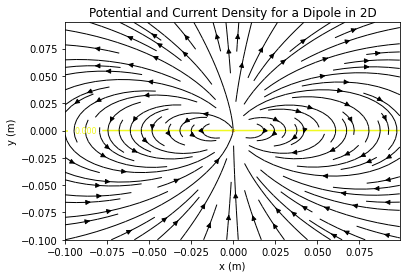

In [18]:
#initialize the variables (x and y in cm, Q as a current dipole with 20fAm)
x=np.arange(-10,10,0.1)
y=np.arange(-10,10,0.1)
r_q=[0,0]
Q=np.array([0,20])*1e-15;
sigma = 0.33
#create the meshgrid for calculation and plotting (in SI --> m)
X,Y=np.meshgrid(x/100,y/100)



def phi_dip(r, rq, Q, sigma):
    r_diff = r - rq
    r_diff_norm = np.linalg.norm(r_diff, axis=-1)
    return (1 / (4 * np.pi * sigma)) * (np.sum(Q * r_diff, axis=-1) / (r_diff_norm**3))

def J_dip(r, rq, Q, sigma):
    Q = np.array(Q)
    r_diff = r - rq
    r_diff_norm = np.linalg.norm(r_diff, axis=-1)
    term1 = (3 * r_diff * np.sum(Q * r_diff, axis=-1)[:, :, np.newaxis]) / (r_diff_norm[:, :, np.newaxis]**5)
    term2 = Q[np.newaxis, np.newaxis, :] / (r_diff_norm[:, :, np.newaxis]**3)
    return (1 / (4 * np.pi)) * (term1 - term2)


# Calculate the potential on the whole meshgrid 
phi = phi_dip(np.stack([X, Y], axis=-1),  r_q, Q, sigma)
# Calculate the current density on the whole meshgrid 
J = J_dip(np.stack([X, Y], axis=-1), r_q, Q, sigma)


plt.figure()
contour = plt.contour(X, Y, phi, cmap='plasma')
plt.clabel(contour, inline=True, fontsize=8)
plt.streamplot(X, Y, J[..., 0], J[..., 1], color='black', density=1, linewidth=1)

plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title('Potential and Current Density for a Dipole in 2D')
plt.show()